<div style="text-align:center; background-color: #f0f0f0; padding: 12px;">
    <h1 style="background-color: #007acc; color: white; padding: 10px;"><b>EXPLORACIÓN DE DATOS MEDIANTE PROYECCIONES</b></h1>
    <p><strong>Materia:</strong> Análisis Exploratorio de Datos</p>
    <p><strong>Programa:</strong> Maestría en Ciencia de Datos e Información, INFOTEC</p>
    <p><strong>Docente:</strong> Dr. José Ortiz Béjar</p>
    <p><strong>Alumno:</strong> Rodrigo Guarneros Gutiérrez</p>
</div>

### ***La principal idea de la reducción dimensional es mapear los datos de un espacio dimensional alto a un espacio dimensional más bajo, para los propósitos de la visualización de los mismos.*** 

> *B.K. Tripathy, Anvershrithaa Sundareswaran and Shrusti Ghela (2022, p. xi)*.


# **1. Introducción**


De acuerdo con B.K. Tripathy(2022), el clásico Principal Component Analysis (PCA) esta limitado para datos lienales. Mientras que los algoritmos tales como Kernel PCA, Locally Linear Embedding (LLE), Laplacian Eigenmaps (LE), Semidefinite Embedding (SE) y **t-SNE son propicios para datos no lineales**.

En cualquiera de los casos, el reto de estos algoritmos es encontrar una aproximación a los datos originales que tengan muchas menos dimensiones y, al mismo tiempo, retenga la estructura y las relaciones dentro de los datos B.K. Tripathy (2022, p. 2)

La técnica conocida como Descompositicón Simple del Valor (SVD, Single Value Decomposition) se utiliza como una forma de resolver el problema de eigendescomposición de una manera eficiente. Se trata de una técnica de factorización matricial que expresa la matriz de los datos original (X) como una combinación lineal de matrices de rango 1, haciéndola más estable que las rutinas de egenvectores [Tomado de B. K. Tripathy (2022, p. 7)]

En la siguiente imágen tomada de Tripathy, et. al. (2022, p.8), se puede ver un caso donde el número de datos es más grande que la dimensionalidad de cualquier dato puntual (n>d). La técnica SVD produce tres matrices U, D y V^T. U y V^T son ortogonales (su producto punto en cada columna es cero), y cuyas columnas representan eigenvectores ortonormales de XX^T y X^TX. La matriz D es diagnonal a la matriz (Valores singulares en la diagonal). Cada valor singular es a raíz cuadrada de los correspondiente eigenvalores de U o V^T (ambas matrices tienen el mismo eigenvalor positivo). La matriz U representa el eigenvector de XX^T, el cual es la covarianza de la matriz. De aquí, se puede facilmente encontrar el top eigenvectors $p$ de la matriz de covarianza (la solución para PCA), usando SVD sobre la matriz X. Es importante considera que después de implementar el PCA en un conjunto de datos, los componentes principales son independientes uno del otro y no hay correlación entre ellos.

![SVD](SVD.jpg)




<div style="background-color: #f0f0f0; padding: 12px;">
    <h1 style="background-color: #007acc; color: white; padding: 10px;"><b>1. Investiga sobre t-SNE y/o SVD (ver [5,6] en el notebook) su funcionamiento y sus implementaciones existentes, esto para incluirlas como una alternativa mas para proyección de datos de alta dimensión.</b></h1>
</div>

### t-distribuida Incrustación de Vecino Estocástico (t-SNE)

La siguiente respuesta se elaboró con base principalmente del Capítulo 13 de Tripathy, et. al (2022). 

#### ¿En qué consiste?

Se trata de una técnica de reducción dimensional no lineal. Entre sus propiedades se encuentra: 

* Preservan muy bien la **geometría total de los datos**. 
* Retienen la estructura local o global de los datos en un simple mapeo dentro de un espacio dimensional menor.

Se trata de una variante de la técnica de Incrustación de Vecino Estocástico (SNE) que consiste en: 

1. Convierte las distancias entre los puntos de datos a probabilidades condicionales. Cuál es la probabilidad de que el punto $x_i$ elija el punto $x_j$ como su vecino, si el criterio de selección fuera la densidad de probabilidad Gausiana centrada en $x_i$. 

2. Como es de esperarse, en el espacio dimensional más pequeño $p$. Es posible computar la probabilidad similar pero de los puntos transformados $y_i$ e $y_j$, con una probabilidad similar a la de sus puntos originales.

3. En virtud de que las similaridades entre los puntos de datos de la dimensión original son retenidos en el espacio menor, las probabilidades condicionales son iguales.

Basados en lo anterior, el criterio de selección del mapeo de los datos en una dimensión menor $p$ es que se minimize la diferencia entre $p_{i|j}$ y $q_{i|j}$ (las funciones de densidad de probabilidad de ambos conjuntos). De tal forma que la función de costos a minimizar con este criterio está dado por $C$ (Divergencia de Kullback-Leibler), como la medida de divergencia de las dos probabilidades condicionales: 

$$C = \sum_{i}{KL}(P_{i} || Q_{i}) = \sum_{ij} p_{j|i} \log\left(\frac{p_{j|i}}{q_{j|i}}\right)$$

La minimización de esta función presenta el problema de saturación o hacinamiento, debido al hecho de que las dimensiones mayores tienen más espacio para acomodar los datos que las dimensiones menores. 

La técnica t-SNE quiere resolver este problema de saturación o hacinamiento, modificando la función de costos simétrica y utilizando uns distribución t en lugar de una Gausiana:

* La t-SNE utiliza probabilidades conjuntas donde $$p_{ij} = p_{ji}$$ (en la dimensión original) y $$q_{ij} = q_{ji}$$ (en la dimensión reducida).
* Esta técnica utiliza el método del gradiente descendente para minimizar la función de costos simétrica

### Ventajas:

- Supera a otras técnicas en el manejo eficiente de datos no lineales.
- Capta muy bien las relaciones polinómicas complejas, convirtiéndola en una técnica de reducción de dimensionalidad no lineal altamente eficiente.
- Conserva muy bien la localidad de los datos y al mismo tiempo revela algunos de sus aspectos más importantes.

### Desventajas:

- Si bien su rendimiento es eficiente en conjuntos de datos pequeños, su tiempo cuadrático y la complejidad del espacio lo hace computacionalmente complejo cuando se aplica a conjuntos de datos grandes. Su lentitud computacional es evident en unos pocos de miles de datos.  

- Además, el desempeño de t-SNE en dimensionalidad general. La reducción donde la dimensionalidad de los datos se reduce a una dimensión mayor que tres (p>3) no está muy clara. El rendimiento de t-SNE cuando la reducción a un espacio bidimensional o tridimensional no se puede generalizar a dimensiones superiores a tres debido a las pesadas colas del estudiante distribución t que, en espacios de alta dimensión, conduce a mapeos que no preservan la estructura local de los datos ya que las colas pesadas abarcan una gran proporción de la masa de probabilidad bajo la distribución t en altos espacios dimensionales.

Esta técnica es utilizada en el procesamiento de imágenes, bioinformática, procesamiento de señales, procesamiento de lenguaje, NLP, y otros.

<div style="background-color: #f0f0f0; padding: 12px;">
    <h1 style="background-color: #007acc; color: white; padding: 10px;"><b>2. ¿Es posible encontrar una estructura en los datos2.csv?</b></h1>
</div>

Determina si es posible encontrar una estructura en los datos contenidos en **datos2.csv**.

* Puedes obtener toda la matriz de datos como:
    data=pd.read_csv('datos2.csv').values[1:,1:]
    omitimos el encabezado y la primera columna que contiene el identificador de cada objeto en la colección.

* Describe los datos.
    Se trata de 110 variables y 94 observaciones. 
    Los datos no contienen datos nulos o missing values.
    Los datos tienen un recorrido para cada columna que va del valor mínimo 0 al valor máximo 0.97 o 1.
    En general parecen ser muy similares.
    Aunque se puede advertir una seria diferencia en la variación entre cada variable, tal y como se ilustra en la matriz de covarianzas (varianzas respecto a los otros datos y ellos mismos) y la de correlación (varianza e intensidad de la relación) con una estructura y patrones que debería reflejar una reducción de dimensiones.
    ![correlacion](correlation_matriz.jpg)
* Analiza los datos usando las diferentes estrategias/herramientas vistas hasta ahora. Deberás aplicar al menos dos alternativas de proyección para obtener una representación 2D de los datos.

    - Se utiliza el clásico Análisis de Componente Principal (PCA, por sus siglas en inglés)
    
> **Para este caso se reduce a dos componentes principales, los cuales tienen la capacidad de explicar una varianza acumulada de todos los datos de  51.43%**, tal y como se ilustra a continuación: 
        
![varianza](var_explicada_2.jpg)

> **En tanto que con tres componentes principales el nuevo espacio vectorial explica 63.60% de la varianza en la dimensión original**, tal y como se ilustra a continuación.

![varianza](var_explicada_3.jpg)

> **En general se estaría considerando incluir hasta 10 componentes para capturar el mayor porcentaje de varianza del espacio vectorial original sin hacer muy complicado el modelo**.

![componentes](Numero_Componentes.jpg)

> A reserva de hacer un análisis de agrupación más profundo, la cantidad de clases identificadas oscila entre 7 y 9 con esta metodología, en el espacio vectorial optimizado a 2 es el siguiente:

![clusters](clases_pca.jpg)



    - t-SNE (t distribuida Incrustación de Vecino Estocástico)
    
> Para este caso en particular tenemos que es posible identificar hasta 14 clases:

![tsne](clases_tsne.jpg)
    


* Compara las gráficas de las proyecciones en términos de su capacidad descriptiva y explicativa.

* Para una proyección adecuada deberían poder identificarse entre 7 y 14 clases

In [3]:
# Dependencias
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from sklearn.datasets  import make_blobs,make_circles
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

### Obteniendo la información

In [4]:
data=pd.read_csv('datos2.csv').values[1:,1:]
data.shape # 94 puntos y 110 variables, se eliminó encabezado y primera columna

(94, 110)

### Descripción de la información

In [14]:
data = pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 110 entries, 0 to 109
dtypes: object(110)
memory usage: 80.9+ KB


In [15]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
unique,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
top,0.910831,0.760617,0.595962,0.706491,0.039998,0.391113,0.479075,0.606625,0.747074,0.932187,...,0.915017,0.662466,0.315352,0.062588,0.288017,0.573578,0.684201,0.545382,0.648262,0.549465
freq,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:

for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')


In [37]:
description = data.describe()
description

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.864315,0.719927,0.354785,0.703554,0.313261,0.724301,0.584276,0.414982,0.352202,0.463950,...,0.642692,0.539386,0.411516,0.525701,0.684336,0.702193,0.554762,0.347874,0.212976,0.440478
std,0.104046,0.110338,0.216250,0.085902,0.151032,0.174446,0.188686,0.187910,0.184727,0.244787,...,0.157021,0.209511,0.239302,0.273680,0.156969,0.167754,0.240961,0.138887,0.169918,0.188918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.844248,0.680441,0.190346,0.684396,0.224832,0.620679,0.470157,0.269199,0.237931,0.304353,...,0.566150,0.411084,0.219706,0.300868,0.646102,0.574065,0.419546,0.256177,0.104712,0.332817
50%,0.863521,0.722430,0.285067,0.707420,0.310044,0.768337,0.543137,0.407584,0.321198,0.455242,...,0.636906,0.561936,0.371698,0.503298,0.698493,0.721403,0.610198,0.342300,0.152641,0.464224
75%,0.904964,0.769055,0.510516,0.731483,0.414598,0.840757,0.718255,0.531492,0.415320,0.628271,...,0.704384,0.673000,0.655199,0.803668,0.768986,0.847489,0.747760,0.415233,0.269888,0.561867
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 110 entries, 0 to 109
dtypes: float64(110)
memory usage: 80.9 KB


In [35]:
nulls = data.isnull().sum()
print(nulls)
nulls.unique()

0      0
1      0
2      0
3      0
4      0
      ..
105    0
106    0
107    0
108    0
109    0
Length: 110, dtype: int64


array([0], dtype=int64)

<Axes: >

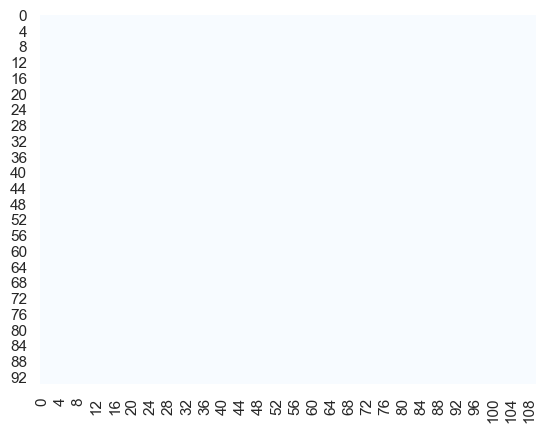

In [46]:
sns.heatmap(data.isnull(), cbar = False, cmap='Blues') #no hay valores nulos

In [47]:
data.duplicated().sum()

0

In [40]:
description.loc['max'].unique()

array([1.        , 0.97138498])

In [52]:
cov_matrix = data.cov()
cov_matrix

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.010826,0.005511,-0.001756,0.006652,-0.005855,0.005318,-0.000733,0.003990,-0.002835,0.002902,...,-0.000869,-0.005477,-0.004326,0.000519,-0.000859,0.002178,0.002112,-0.000597,-0.000665,-0.002361
1,0.005511,0.012175,-0.000433,0.004909,-0.006934,0.005344,-0.004595,-0.000688,-0.007122,-0.003641,...,-0.000799,0.004010,0.003446,0.005450,0.005352,0.002490,-0.006288,-0.004052,-0.006008,0.000717
2,-0.001756,-0.000433,0.046764,0.003804,-0.002895,-0.007225,-0.026672,-0.008955,0.015814,0.031843,...,0.023068,0.017984,-0.003926,-0.037196,-0.019195,0.003422,0.030066,0.017172,0.005047,-0.024635
3,0.006652,0.004909,0.003804,0.007379,-0.005627,0.002490,-0.006534,0.000194,-0.002563,0.001963,...,-0.000589,0.001216,0.002311,-0.000152,-0.001899,0.000499,0.002354,0.001372,-0.000744,-0.004782
4,-0.005855,-0.006934,-0.002895,-0.005627,0.022811,0.000350,0.006141,-0.007750,-0.004795,-0.002527,...,-0.000361,-0.002328,-0.006049,0.003930,0.003633,0.004912,0.002694,-0.003545,-0.005876,-0.007170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.002178,0.002490,0.003422,0.000499,0.004912,0.018959,0.006154,-0.007211,0.000454,0.009556,...,0.003374,-0.018750,-0.026049,-0.018333,0.002831,0.028141,0.018684,-0.002599,-0.011382,-0.006280
106,0.002112,-0.006288,0.030066,0.002354,0.002694,0.004145,-0.001473,-0.003132,0.023386,0.049446,...,0.020778,-0.013734,-0.037802,-0.055229,-0.024640,0.018684,0.058062,0.021095,0.009087,-0.024426
107,-0.000597,-0.004052,0.017172,0.001372,-0.003545,-0.006031,-0.007869,0.001496,0.018060,0.026821,...,0.010295,0.002479,-0.007843,-0.027079,-0.017087,-0.002599,0.021095,0.019290,0.012702,-0.010599
108,-0.000665,-0.006008,0.005047,-0.000744,-0.005876,-0.018277,0.003422,0.018908,0.022125,0.019440,...,0.003046,-0.000912,-0.003387,-0.015277,-0.019092,-0.011382,0.009087,0.012702,0.028872,0.007710


In [53]:
corr_matrix = data.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,1.000000,0.480031,-0.078048,0.744300,-0.372595,0.292974,-0.037359,0.204071,-0.147497,0.113950,...,-0.053175,-0.251264,-0.173749,0.018215,-0.052585,0.124780,0.084245,-0.041337,-0.037594,-0.120136
1,0.480031,1.000000,-0.018135,0.517885,-0.416117,0.277620,-0.220727,-0.033206,-0.349434,-0.134817,...,-0.046144,0.173474,0.130515,0.180466,0.309020,0.134544,-0.236521,-0.264389,-0.320439,0.034381
2,-0.078048,-0.018135,1.000000,0.204797,-0.088653,-0.191512,-0.653678,-0.220363,0.395875,0.601539,...,0.679340,0.396931,-0.075874,-0.628480,-0.565487,0.094317,0.576998,0.571729,0.137357,-0.603013
3,0.744300,0.517885,0.204797,1.000000,-0.433751,0.166142,-0.403127,0.012010,-0.161503,0.093368,...,-0.043698,0.067565,0.112429,-0.006446,-0.140840,0.034655,0.113741,0.114969,-0.050963,-0.294639
4,-0.372595,-0.416117,-0.088653,-0.433751,1.000000,0.013302,0.215481,-0.273072,-0.171875,-0.068358,...,-0.015207,-0.073584,-0.167370,0.095076,0.153262,0.193893,0.074038,-0.168983,-0.228958,-0.251297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.124780,0.134544,0.094317,0.034655,0.193893,0.647853,0.194415,-0.228773,0.014663,0.232719,...,0.128100,-0.533483,-0.648881,-0.399323,0.107497,1.000000,0.462228,-0.111541,-0.399306,-0.198174
106,0.084245,-0.236521,0.576998,0.113741,0.074038,0.098608,-0.032395,-0.069179,0.525395,0.838296,...,0.549149,-0.272048,-0.655575,-0.837494,-0.651439,0.462228,1.000000,0.630332,0.221938,-0.536570
107,-0.041337,-0.264389,0.571729,0.114969,-0.168983,-0.248939,-0.300293,0.057327,0.703907,0.788910,...,0.472079,0.085184,-0.235991,-0.712414,-0.783775,-0.111541,0.630332,1.000000,0.538248,-0.403971
108,-0.037594,-0.320439,0.137357,-0.050963,-0.228958,-0.616597,0.106744,0.592192,0.704879,0.467379,...,0.114157,-0.025618,-0.083300,-0.328524,-0.715827,-0.399306,0.221938,0.538248,1.000000,0.240195


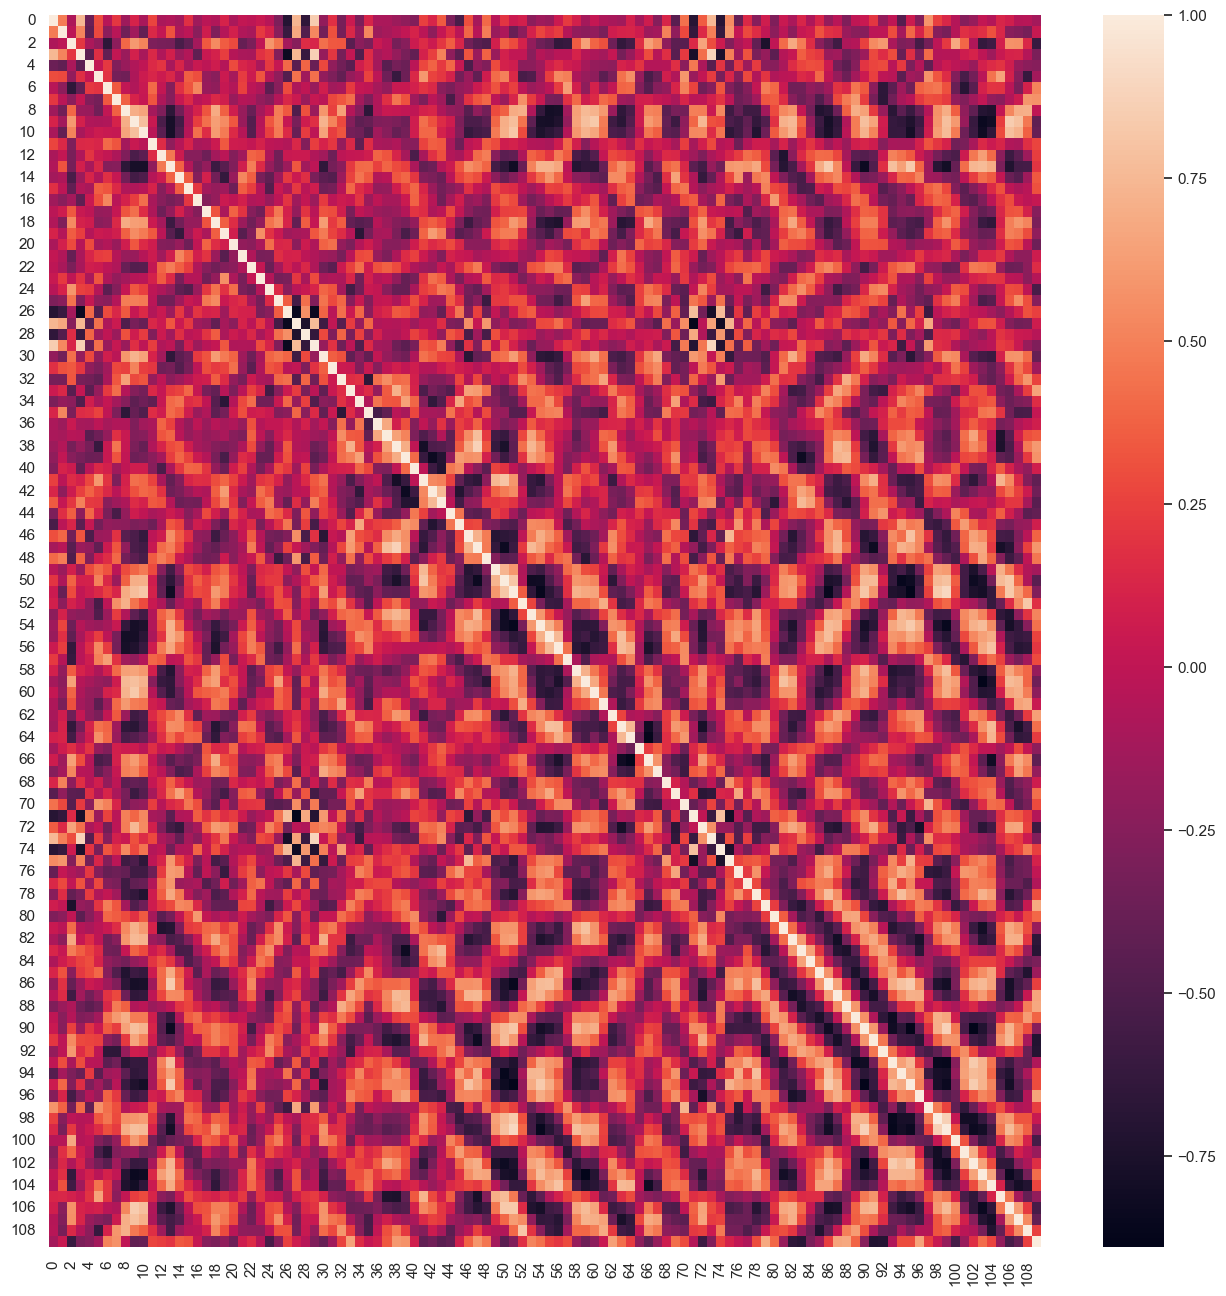

In [56]:
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = False)
plt.savefig('correlation_matriz.jpg')
plt.show()

### Proyecciones

Para efectos de esta sección se eligieron las técnicas PAC (para relaciones lineales) y t-SNE

In [97]:
#Calculamos V_j y \lambda_j
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [98]:
print(pca.components_)

[[-9.69312274e-03  2.11183777e-02 -9.61009014e-02 -4.61588531e-03
  -1.18674436e-02 -1.89862416e-02 -1.05499282e-02 -5.78481475e-03
  -1.06391804e-01 -1.86988737e-01 -1.18127567e-01 -1.18266747e-02
   6.54018285e-02  1.57549749e-01  7.28431880e-02  1.70992402e-04
  -3.31892297e-02 -4.92090916e-02 -7.69086442e-02 -8.75705800e-02
  -4.04424793e-02  1.17359540e-02  7.14546469e-02  3.63442178e-03
  -4.55865352e-02 -6.14139073e-02  1.33978211e-03  2.55341871e-02
  -1.42934789e-02 -1.65337031e-02 -1.00155969e-01 -4.76024598e-02
  -1.57625197e-02  8.30871600e-02  5.76188214e-02  5.31848152e-02
   3.27213673e-02  8.66108380e-02  1.35716236e-01  8.60849874e-02
  -6.03307242e-03 -1.38300170e-01 -5.91609629e-02 -2.29250384e-02
  -1.60307611e-02  4.79696927e-02  9.94156215e-02  1.48509873e-01
   6.21197301e-02 -1.35005202e-01 -2.11213851e-01 -1.80184190e-01
  -3.74090639e-02  1.12263927e-01  1.69684033e-01  1.18384042e-01
   1.06056812e-01  9.16070461e-04 -1.37942604e-01 -1.46906106e-01
  -1.27272

In [99]:
# Para acceder a los valores principales utilizamos 
print(pca.explained_variance_)

[1.36136272 0.5264207 ]


In [100]:
data_pca = pca.transform(data)

print(f'Dimensión original: {data.shape}')
print(f'Dimensión reducida a 2: {data_pca.shape}')

Dimensión original: (94, 110)
Dimensión reducida a 2: (94, 2)


In [101]:
data_pca.shape

(94, 2)

In [102]:
data.shape

(94, 110)

### Los datos transformados se han reducido a dos dimensiones. Para comprender el efecto de esta reducción de dimensionalidad, podemos graficar los datos reducidos:

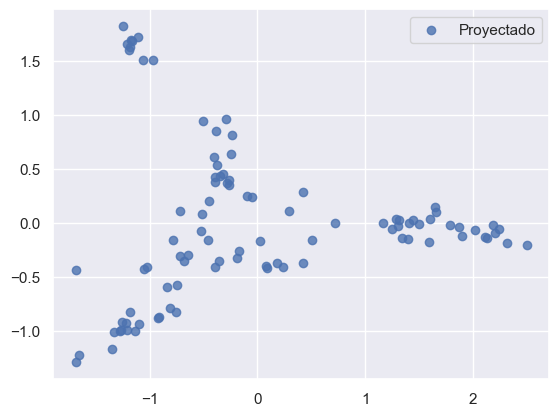

In [103]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.8,color='b',label='Proyectado')
plt.axis('equal');
plt.legend()

In [104]:
# Cómo se ve su estructura:
data_pca_df = pd.DataFrame(data_pca)
data_pca_df.describe()

,0,1
count,9.400000e+01,9.400000e+01
mean,2.125959e-17,-4.842462e-17
std,1.166774e+00,7.255485e-01
min,-1.683181e+00,-1.287615e+00
25%,-9.593248e-01,-4.036815e-01
50%,-3.538034e-01,-7.109445e-02
75%,1.225326e+00,2.778897e-01
max,2.497406e+00,1.824986e+00


In [105]:
corr_dtapca = data_pca_df.corr()

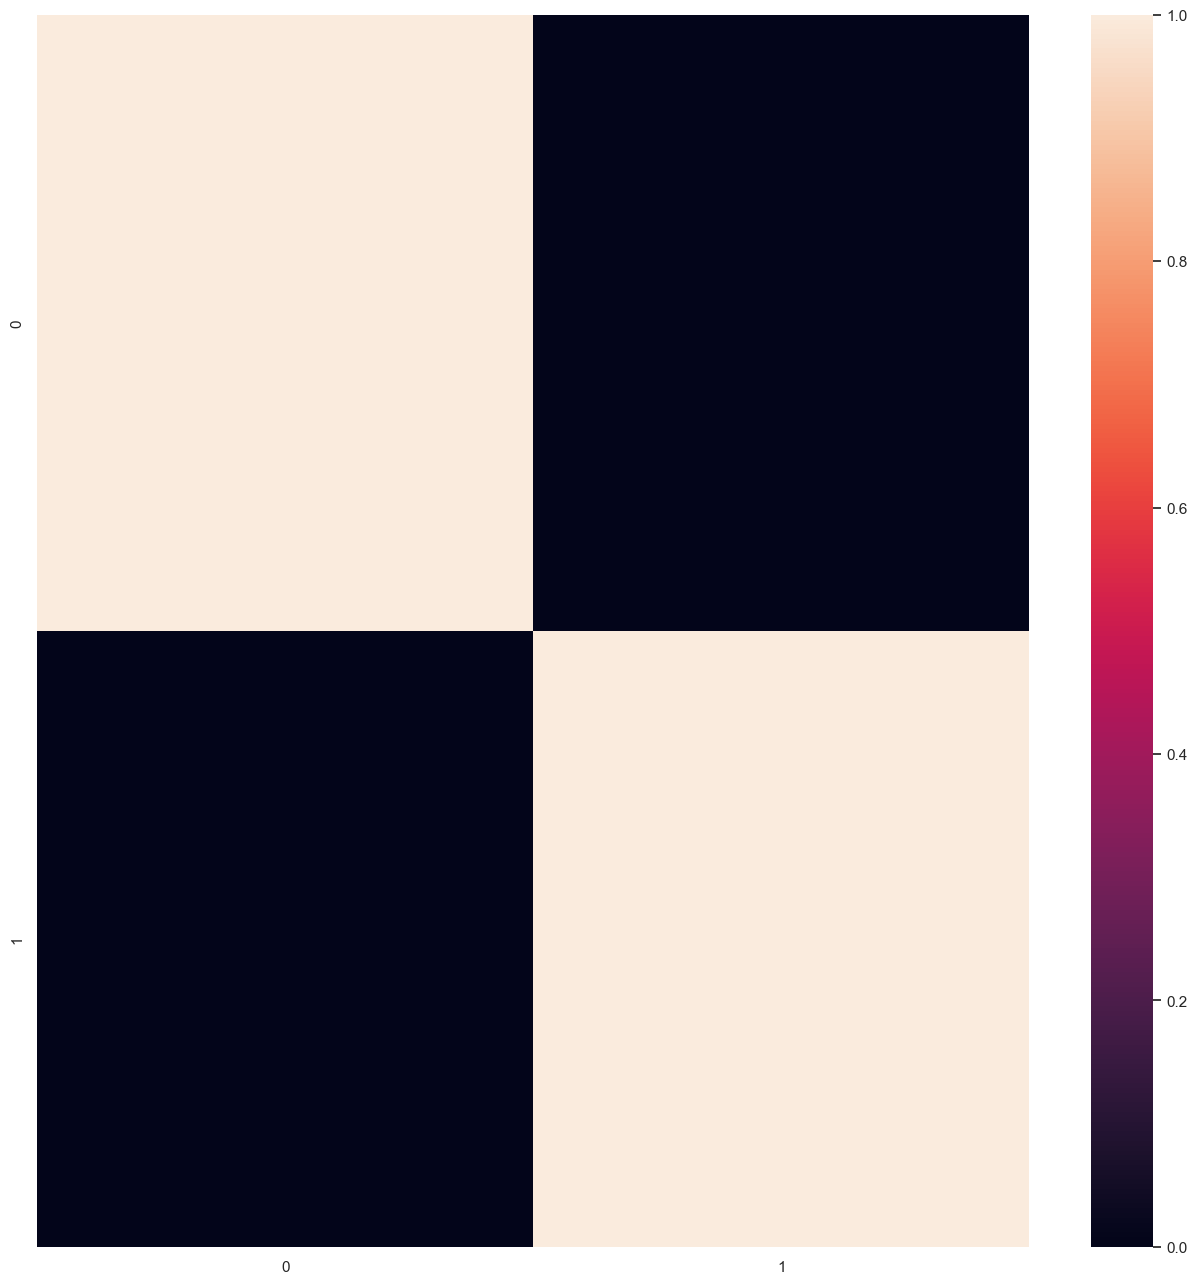

In [106]:
plt.figure(figsize = (16,16))
sns.heatmap(corr_dtapca, annot = False)
plt.savefig('correlation_matriz_pca.jpg')
plt.show()

In [107]:
# qué porcentaje de la variación explican nuestros dos y tres componentes: 

Tasas_variabilidad_explicados = pca.explained_variance_ratio_
Tasas_variabilidad_explicados

array([0.37087468, 0.14341226])

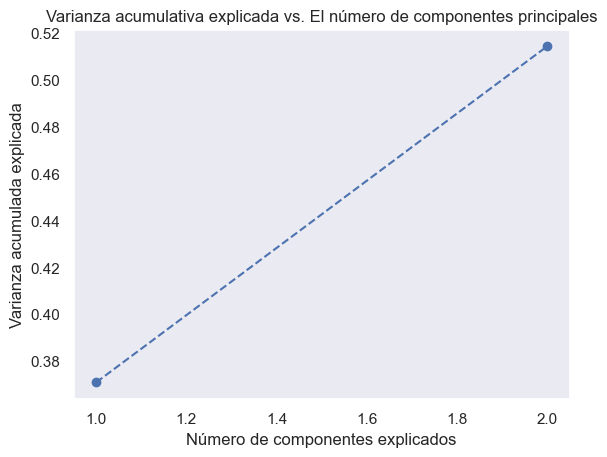

In [108]:
cumulative_variance = Tasas_variabilidad_explicados.cumsum()

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de componentes explicados')
plt.ylabel('Varianza acumulada explicada')
plt.title('Varianza acumulativa explicada vs. El número de componentes principales')
plt.grid()
plt.savefig('var_explicada_3.jpg')
plt.show()

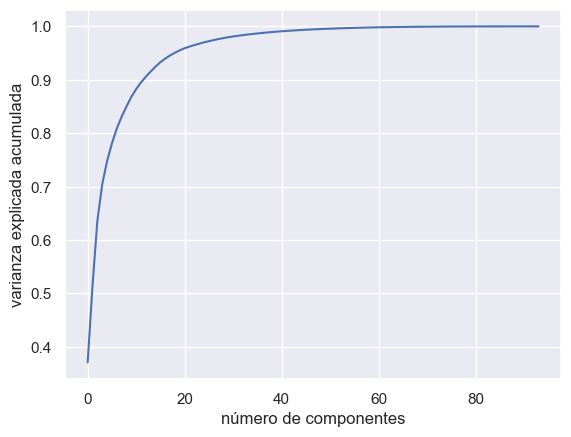

In [114]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('varianza explicada acumulada')
plt.savefig('Numero_Componentes.jpg')

C:\Users\rodri\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rodri\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


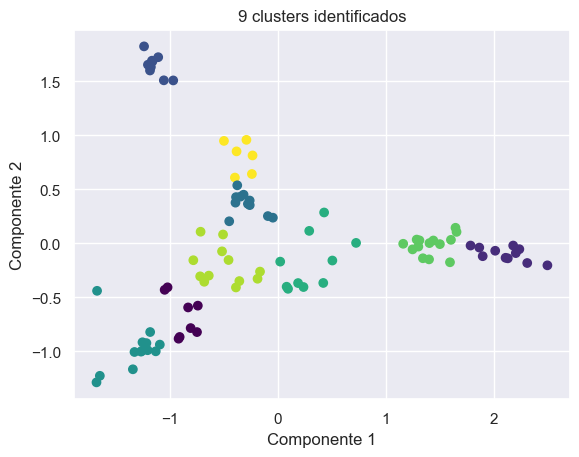

In [121]:
from sklearn.cluster import KMeans

num_clusters = 9

kmeans = KMeans(n_clusters=num_clusters)

kmeans.fit(data_pca)

cluster_labels = kmeans.labels_

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title(f'{num_clusters} clusters identificados')
plt.savefig('clases_pca.jpg')
plt.show()


## t-SNE

In [122]:
import numpy as np
from sklearn.manifold import TSNE

In [123]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)

In [124]:
tsne_result = tsne.fit_transform(data)

C:\Users\rodri\AppData\Local\Temp\ipykernel_27848\1918887118.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='rainbow')


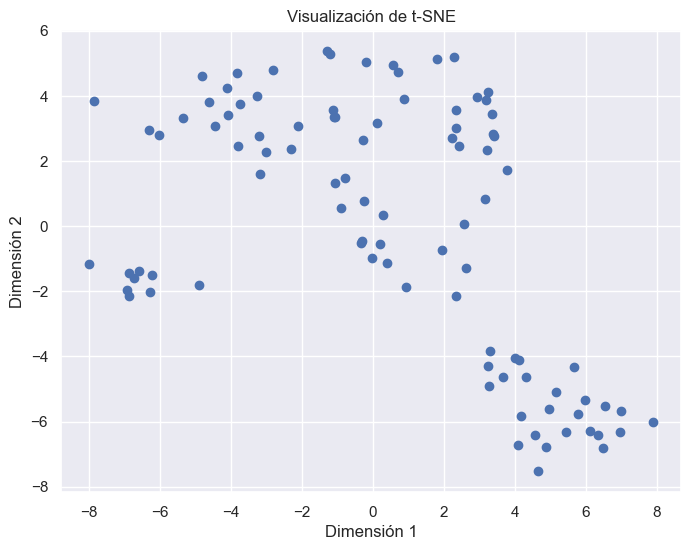

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='rainbow')
plt.title('Visualización de t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

C:\Users\rodri\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rodri\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


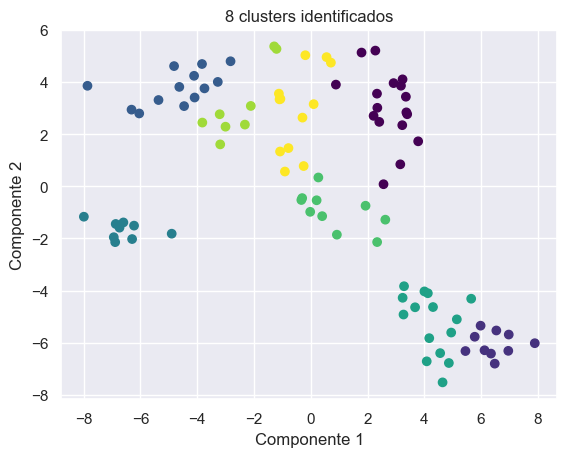

In [132]:
num_clusters = 8

kmeans = KMeans(n_clusters=num_clusters)

kmeans.fit(data_pca)

cluster_labels = kmeans.labels_

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title(f'{num_clusters} clusters identificados')
plt.savefig('clases_tsne.jpg')
plt.show()

# Conclusiones

- Sin lugar a dudas cada técnica vista aquí y en la literatura nos permite observar diferentes virtudes y defectos. 
- Si se tiene la certeza de que las relaciones son lineales, es mucho mejor técnica el clásico PCA.
- La reducción dimensional es un elemento fundamental para la ciencia de datos.
- Espero tener la oportunidad de platicar sobre cada unas de las técnicas y el potencial que en su experiencia tienen.

# Referencias

Dr. José Ortiz Béjar (2023), Jupyter Notebook sobre Métodos de Proyección. Disponible en: https://colab.research.google.com/drive/1NVG3tMSO6VDMLKjEATI16lU6hjCMm4-I?usp=sharing

Para la actividas solicitada se utilizan las funciones implementadas en pandas  (https://pandas.pydata.org/docs/user_guide/missing_data.html)

B.K. Tripathy, Anvershrithaa Sundareswaran and Shrusti Ghela (2022). Unsupervised Learning Approaches for Dimenasionality Reduction and Data Visualizations. Disponible en: 
https://aulavirtual.infotec.mx/pluginfile.php/84918/mod_label/intro/Unsupervised%20Learning%20Approaches%20for%20Dimensionality%20Reduction%20and%20Data%20Visualization-CRC%20Press%20%282021%29%281%29.pdf?time=1680398740666